In [18]:
import pandas as pd

# read vals from csv
df_allergy = pd.read_csv('ODL_ALLERGY.csv')
df_allergy_customer = pd.read_csv('ODL_ALLERGY_CUSTOMER.csv')
df_order = pd.read_csv('ODL_ORDER.csv')
df_order_item = pd.read_csv('ODL_ORDER_ITEM.csv')
df_orderables = pd.read_csv('ODL_ORDERABLES.csv')
df_restaurant = pd.read_csv('ODL_RESTAURANT.csv')

# remove unwanted cols
df_allergy = df_allergy.drop(columns=['id', '_rid', '_self', '_etag', '_attachments', '_ts'])
df_allergy_customer = df_allergy_customer.drop(columns=['id', '_rid', '_self', '_etag', '_attachments', '_ts'])
df_order = df_order.drop(columns=['id', '_rid', '_self', '_etag', '_attachments', '_ts'])
df_order_item = df_order_item.drop(columns=['id', '_rid', '_self', '_etag', '_attachments', '_ts', 'Column_useless'])
df_orderables = df_orderables.drop(columns=['id', '_rid', '_self', '_etag', '_attachments', '_ts'])
df_restaurant = df_restaurant.drop(columns=['id', '_rid', '_self', '_etag', '_attachments', '_ts'])
df_restaurant = df_restaurant.drop(df_restaurant.columns[0], axis=1)

# take city col from other table
df_order = df_order.join(df_restaurant[['city']], on='restaurant_id')

# split datetime and keep only hours, remove minutes
df_order[['creation_date_only', 'creation_time']] = df_order['creation_date'].str.split(' ', 1, expand=True)
df_order['creation_time'] = df_order['creation_time'].str.split(':', 1, expand=True)[0]

# what city to keep
df_order_ny = df_order[df_order.city =='New York']
df_order_sf = df_order[df_order.city =='San Francisco']

# hours df per city for plot as int for sorting
df_hours_ny = df_order_ny['creation_time'].value_counts().rename_axis('creation_time').reset_index(name='counts')
df_hours_ny['creation_time'] = df_hours_ny['creation_time'].str.strip()
df_hours_ny['creation_time'] = df_hours_ny['creation_time'].astype(int)
df_hours_ny = df_hours_ny.sort_values(by='creation_time', ascending=True)

df_hours_sf = df_order_sf['creation_time'].value_counts().rename_axis('creation_time').reset_index(name='counts')
df_hours_sf['creation_time'] = df_hours_sf['creation_time'].str.strip()
df_hours_sf['creation_time'] = df_hours_sf['creation_time'].astype(int)
df_hours_sf = df_hours_sf.sort_values(by='creation_time', ascending=True)

df_hours_ny

,creation_time,counts
11,8,4760
14,9,4631
12,10,4652
13,11,4651
10,12,5062
3,13,5605
6,14,5456
9,15,5404
8,16,5414
4,17,5529


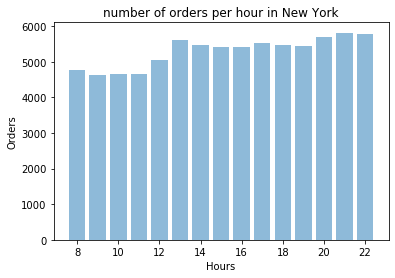

In [19]:
import matplotlib.pyplot as plt

plt.bar(df_hours_ny['creation_time'], df_hours_ny['counts'], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.ylabel('Orders')
plt.xlabel('Hours')
plt.title('number of orders per hour in New York')

plt.show()

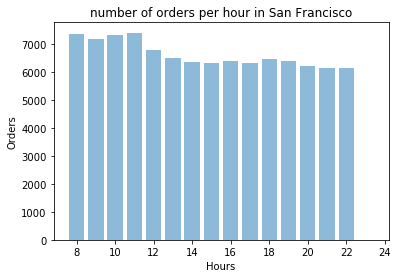

In [20]:
plt.bar(df_hours_sf['creation_time'], df_hours_sf['counts'], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.ylabel('Orders')
plt.xlabel('Hours')
plt.title('number of orders per hour in San Francisco')

plt.show()